## Example to run the plot_asso
### Materials
#### Must have
- phasenet_picks (Path): Path to the phasenet picks.
- gamma_picks (Path): Path to the gamma picks.
- gamma_events (Path): Path to the gamma events.
- station (Path): Path to the station info.
- event_i (int): Index of the event to plot.
- fig_dir (Path): Path to save the figure.
#### optional (but actually you should select sac (seismometer) or h5 (DAS) data)
- h3dd_hout (Path, optional): Path to the h3dd hout. Defaults to None.
- amplify_index (int, optional): Amplify index for sac data. Defaults to 5.
- sac_parent_dir (Path, optional): Path to the sac data. Defaults to None.
- sac_dir_name (Path, optional): Name of the sac data directory. Defaults to None.
- h5_parent_dir (Path, optional): Path to the h5 data (DAS). Defaults to None.
- parallel (bool, optional): Whether to use parallel processing. Defaults to False.

### Directory structure
#### sac data -> sac_parent_dir / date / sac_dir_name / station_name.SAC    
Date would acquire througth the reading of the gamma_events.csv from GaMMA.  
The reason why we need date is to automatically find the sac data due to we might have the events across the day.

### Example 1: Only seismometer

#### 1. Define the Path object

In [1]:
from pathlib import Path

# waveform dataset
sac_parent_dir = Path('/home/patrick/Work/Hualien0403/Dataset')
sac_dir_name = 'data_final'

# phasenet_picks
phasenet_picks = Path(
    '/home/patrick/Work/Hualien0403/PhaseNet_DAS/picks_phasenet_das/old_shit/bat_cwb_sm_20240403.csv'
)  

# gamma output
gamma_picks = Path(
    '/home/patrick/Work/Hualien0403/GaMMA/Results_all_seis/gamma_picks.csv'
) 
gamma_events = Path(
    '/home/patrick/Work/Hualien0403/GaMMA/Results_all_seis/daily/20240403.csv'
)

# station info
station = Path('/home/patrick/Work/EQNet/tests/hualien_0403/station_seis.csv')

# optional, if you want to see the result of relocation.
h3dd_hout = Path(
    '/home/patrick/Work/Hualien0403/H3DD/GaMMA_cutoff_3/daily_hout/20240403.hout'
)  

# figure save directory
figure_dir = Path('/home/patrick/Work/AutoQuake/test')

#### 2. import function

In [2]:
from autoquake.visualization.check_plot import plot_asso

#### 3. run it

/home/patrick/.conda/envs/AutoQuake_00/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/home/patrick/.conda/envs/AutoQuake_00/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/home/patrick/.conda/envs/AutoQuake_00/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/home/patrick/.conda/envs/AutoQuake_00/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/home/patrick/.conda/envs/AutoQuake_00/lib/python3.10/site-packages/cart

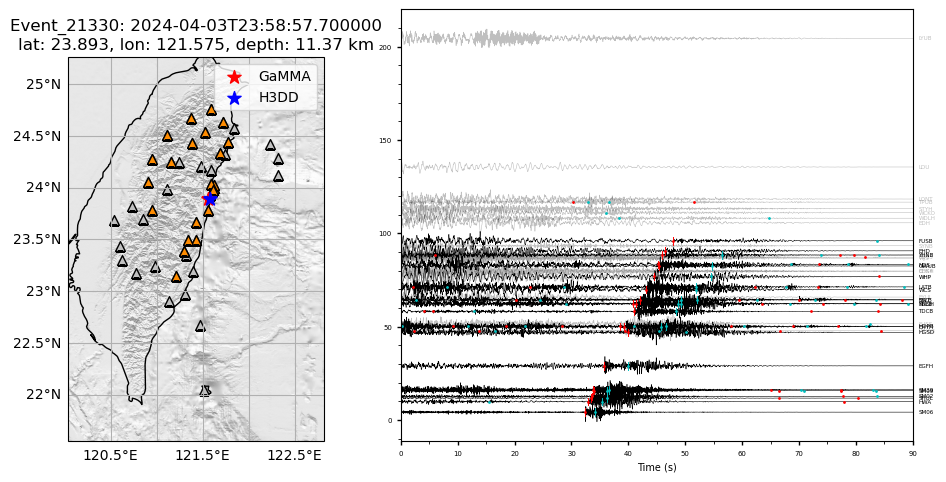

In [3]:
plot_asso(
    phasenet_picks=phasenet_picks,
    gamma_picks=gamma_picks,
    gamma_events=gamma_events,
    station=station,
    event_i=21330, # example
    fig_dir=figure_dir,
    sac_parent_dir=sac_parent_dir,
    sac_dir_name=sac_dir_name,
    h3dd_hout=h3dd_hout,
    amplify_index=5,
    parallel=False
)

#### 3.1 multiprocessing (I haven't try that, but I think it's gonna work fine.)
If you want to accelarate the plotting, you can: 
1. set parallel=True (False is default).    
2. import preprocess_phasenet_csv function, and return the df_phasenet_picks as global variable for all processes.    
3. using multiprocessing.starmap to pack the function, the only variable you need to change is the event_i.

In [6]:
import multiprocessing as mp
from autoquake.visualization.check_plot import preprocess_phasenet_csv
import pandas as pd
df_event = pd.read_csv(gamma_events)
indices = set(df_event['event_index'])
df_all_picks = preprocess_phasenet_csv(phasenet_picks=phasenet_picks)
args_list = [(df_all_picks, gamma_picks, gamma_events, station, i, figure_dir, sac_parent_dir, sac_dir_name, h3dd_hout, 5, True) for i in indices]

# Parallel processing using multiprocessing.Pool and starmap
if __name__ == '__main__':
    # Create a pool of workers
    with mp.Pool() as pool:
        # Use starmap to pass arguments and run plot_asso in parallel
        pool.starmap(plot_asso, args_list)

2601

In [ ]:
# das_seis
phasenet_all = Path(
    '/home/patrick/Work/Hualien0403/PhaseNet_DAS/picks_phasenet_das/new_seis_das_picks.csv'
)  # noqa: E501
gamma_events = Path(
    '/home/patrick/Work/Hualien0403/GaMMA/gamma_test/test_5/gamma_events.csv'
)  # noqa: E501
gamma_picks = Path(
    '/home/patrick/Work/Hualien0403/GaMMA/gamma_test/test_5/gamma_clean_picks.csv'
)  # noqa: E501
station = Path('/home/patrick/Work/EQNet/tests/hualien_0403/new_das_seis_station.csv')
dout_with_pol = Path(
    '/home/patrick/Work/Hualien0403/GaMMA/gamma_test/test_5/for_gafocal_seis_das_new_261.dout'
)  # noqa: E501
dout_with_pol_index = Path(
    '/home/patrick/Work/Hualien0403/GaMMA/gamma_test/test_5/for_gafocal_seis_das_new_261.dout_index'
)  # noqa: E501
gafocal = Path(
    '/home/patrick/Work/AutoQuake/test_format/sd_new_261_gafocal_29249493_results.txt'
)
h3dd_hout = Path(
    '/home/patrick/Work/Hualien0403/H3DD/GaMMA_das_seis_small_region/seis_das_new_0924_261.dat_ch.hout'
)